In [1]:
# mounting the drive to upload cleaned_data.csv
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


(64032, 33)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Please change to correct filepath for clean_data.csv
df=pd.read_csv("./clean_data.csv")
df.shape

(64032, 33)

In [2]:
# Dropping the irrelevant attributes
X=df.drop(columns=["avg_vote"])
Y=df["avg_vote"]
X.head()

,year,duration,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1983,45,7.00,6.75,7.00,7.00,3,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2001,118,6.73,6.40,6.04,6.00,3,4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1983,118,6.00,6.00,6.20,6.00,7,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1981,76,5.75,5.75,5.98,6.05,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2000,97,6.08,6.21,6.56,6.33,7,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
X.tail()

,year,duration,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
64027,2020,95,5.50,4.31,5.24,5.50,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64028,2020,103,4.82,6.83,6.64,5.14,2,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64029,2019,130,7.00,7.00,5.60,7.00,3,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64030,2019,98,5.00,5.00,5.50,6.00,3,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64031,2019,74,6.00,6.00,6.00,6.00,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)

In [5]:
#scaling the features before modelling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# To determine which kernel to apply-linear or non linear, lets check whether the data is linear or not
# Applying linear reg
from sklearn.linear_model import LinearRegression
log_regres = LinearRegression().fit(X, Y)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(log_regres.predict(X), Y))

0.8164128771388608


# SVM Model

In [7]:
# since accuracy is 82 percent, we can apply linear kernel to our data
# train the SVM model
from sklearn.svm import SVC
sv_classifier = SVC(kernel='linear')


sv_model=sv_classifier.fit(X_train_scaled, y_train)


#predicting the y label i.e. "Dataset"
y_pred = sv_classifier.predict(X_test_scaled)     

# evaluating the SVM model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  42   22    8    4    1    0    0    0    0]
 [   2  170  105   28    3    1    0    0    0]
 [   0   35  548  223   35    2    0    0    0]
 [   0    2   76 1251  437   27    0    0    0]
 [   0    0    5  212 2534  523    3    0    0]
 [   0    0    1   12  424 3733  223    0    0]
 [   0    0    0    2   28  534 1321    4    0]
 [   0    0    0    0    0   20  145   53    0]
 [   0    0    0    0    0    0    2    3    3]]
              precision    recall  f1-score   support

           1       0.95      0.55      0.69        77
           2       0.74      0.55      0.63       309
           3       0.74      0.65      0.69       843
           4       0.72      0.70      0.71      1793
           5       0.73      0.77      0.75      3277
           6       0.77      0.85      0.81      4393
           7       0.78      0.70      0.74      1889
           8       0.88      0.24      0.38       218
           9       1.00      0.38      0.55         8

    accuracy             

In [8]:
# retreiving accuracy value from classification report

SVM_report=classification_report(y_test,y_pred,output_dict=True)

SVM_accuracy = SVM_report['accuracy']*100
print("Accuracy of SVM is : "+ str(SVM_accuracy))

Accuracy of SVM is : 75.3884594362458


## ROC curve for SVM

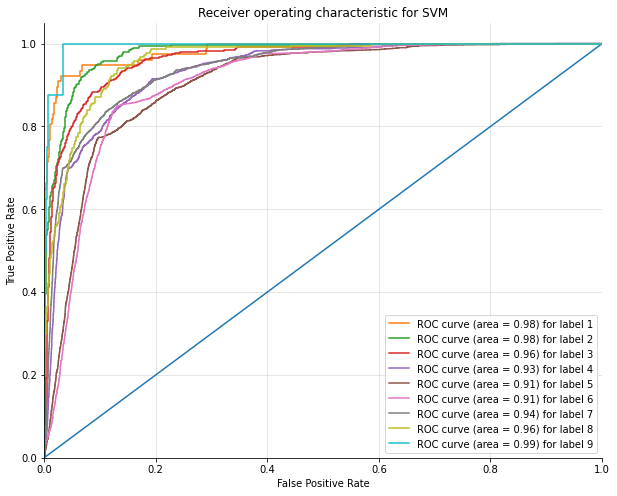

In [9]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
def plot_multiclass_svm(sv_classifier, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = sv_classifier.decision_function(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for SVM')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_svm(sv_classifier, X_test_scaled, y_test, n_classes=9, figsize=(10,8))

# Logistic Regression Model

In [12]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(multi_class='ovr',solver='liblinear', random_state=0)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      0.04      0.08        77
           2       0.37      0.09      0.15       309
           3       0.38      0.13      0.19       843
           4       0.38      0.23      0.28      1793
           5       0.51      0.54      0.52      3277
           6       0.60      0.93      0.73      4393
           7       0.73      0.42      0.53      1889
           8       0.00      0.00      0.00       218
           9       0.00      0.00      0.00         8

    accuracy                           0.56     12807
   macro avg       0.44      0.26      0.28     12807
weighted avg       0.54      0.56      0.52     12807



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# retreiving accuracy value from classification report

logistic_report=classification_report(y_test,y_pred,output_dict=True)

logistic_accuracy = logistic_report['accuracy']*100
print("Accuracy of Logistic Regression is : "+ str(logistic_accuracy))

Accuracy of Logistic Regression is : 56.0240493480128


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##ROC curve for Logistic Regression


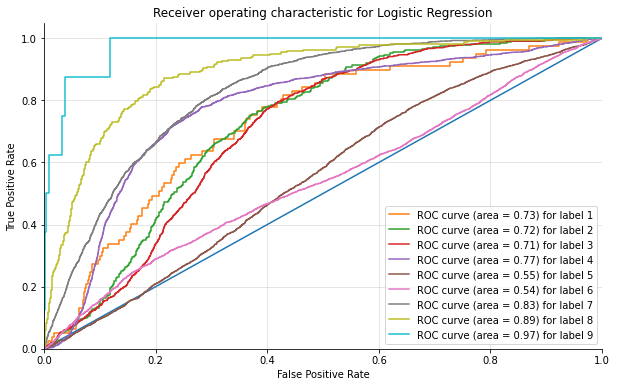

In [ ]:

def plot_multiclass_logistic(logreg, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = logreg.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Logistic Regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_logistic(logreg, X_test_scaled, y_test, n_classes=9, figsize=(10,6))


# KNN Model

In [ ]:
#KNN Model
k_values = np.arange(1, 16)
cross_validation_fold = 10
accuracies = []

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X, Y, cv=cross_validation_fold, scoring='accuracy')
    accuracies.append(scores.mean())
print(accuracies)

[0.5057654916208371, 0.4973786588754511, 0.507483882623337, 0.5291135562333513, 0.5354232035010915, 0.5349233646041347, 0.5394055946409411, 0.5376250767836711, 0.5375003158165923, 0.5375314243606335, 0.5376877547932667, 0.5370006647024744, 0.5354389601883799, 0.534626831114358, 0.5330808735325989]


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning ')

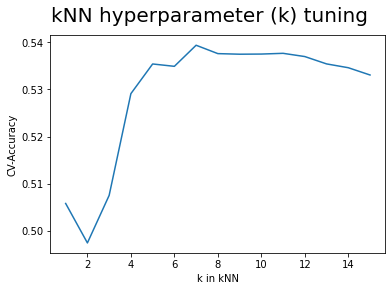

In [ ]:
fig2 = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig2.suptitle('kNN hyperparameter (k) tuning ', fontsize=20)

In [ ]:
#building model using KNN CLassifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7,metric="manhattan")
knn_model=knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  38   22   10    4    3    0    0    0    0]
 [   1  158   94   47    7    2    0    0    0]
 [   0   20  507  239   66   10    0    1    0]
 [   0    4   68 1163  503   53    2    0    0]
 [   0    0   10  183 2464  612    8    0    0]
 [   0    0    1   22  532 3695  143    0    0]
 [   0    0    1    2   49  853  977    7    0]
 [   0    0    0    0    1   48  133   36    0]
 [   0    0    0    0    0    0    4    3    1]]
              precision    recall  f1-score   support

           1       0.97      0.49      0.66        77
           2       0.77      0.51      0.62       309
           3       0.73      0.60      0.66       843
           4       0.70      0.65      0.67      1793
           5       0.68      0.75      0.71      3277
           6       0.70      0.84      0.76      4393
           7       0.77      0.52      0.62      1889
           8       0.77      0.17      0.27       218
           9       1.00      0.12      0.22         8

    accuracy             

In [ ]:
# retreiving accuracy value from classification report

Knn_report=classification_report(y_test,y_pred,output_dict=True)

Knn_accuracy = Knn_report['accuracy']*100
print("Accuracy of KNN is : "+ str(Knn_accuracy))

Accuracy of KNN is : 70.5785898336847


## ROC curve for KNN

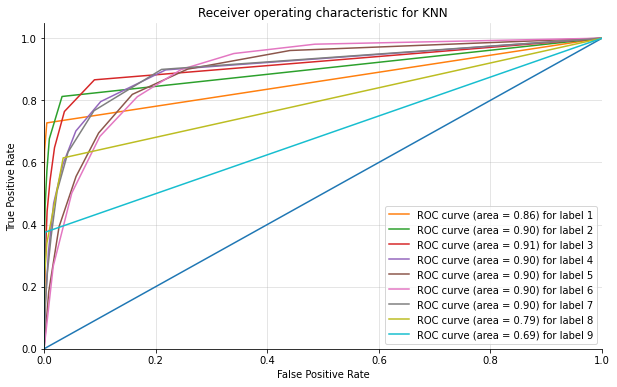

In [ ]:
def plot_multiclass_knn(knn_classifier, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = knn_classifier.predict_proba(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for KNN')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_knn(knn_classifier, X_test_scaled, y_test, n_classes=9, figsize=(10,6))


#Decision Tree Model

In [ ]:
# Decision Tree Model
from sklearn import tree


dt2 = tree.DecisionTreeClassifier(max_depth=2, criterion="gini")
#dt2 = tree.DecisionTreeRegressor(random_state=1, max_depth=6)
dt2.fit(X_train_scaled, y_train)
dt2_score_train = dt2.score(X_train_scaled, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test_scaled, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.6383211322596388
Testing score:  0.6438666354337471


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt2.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    0   71    6    0    0    0    0]
 [   0    0    0  298    9    1    1    0    0]
 [   0    0    0  766   72    5    0    0    0]
 [   0    0    0 1304  423   64    2    0    0]
 [   0    0    0  300 2495  458   24    0    0]
 [   0    0    0   57  786 3227  323    0    0]
 [   0    0    0    3  133  533 1220    0    0]
 [   0    0    0    0   12   31  175    0    0]
 [   0    0    0    0    3    0    5    0    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00       309
           3       0.00      0.00      0.00       843
           4       0.47      0.73      0.57      1793
           5       0.63      0.76      0.69      3277
           6       0.75      0.73      0.74      4393
           7       0.70      0.65      0.67      1889
           8       0.00      0.00      0.00       218
           9       0.00      0.00      0.00         8

    accuracy             

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt3 = tree.DecisionTreeClassifier(max_depth=3,criterion="gini")

dt3.fit(X_train_scaled, y_train)
dt3_score_train = dt3.score(X_train_scaled, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test_scaled, y_test)
print("Testing score: ",dt3_score_test)

Training score:  0.7049487554904832
Testing score:  0.7078941204029047


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt3.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0   66    5    6    0    0    0    0]
 [   0    0  264   34    9    1    1    0    0]
 [   0    0  593  173   70    7    0    0    0]
 [   0    0  124 1180  395   92    2    0    0]
 [   0    0   18  282 2157  794   26    0    0]
 [   0    0    2   55  281 3683  371    1    0]
 [   0    0    0    3   26  456 1368   36    0]
 [   0    0    0    0    1   26  106   85    0]
 [   0    0    0    0    0    3    0    5    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00       309
           3       0.56      0.70      0.62       843
           4       0.68      0.66      0.67      1793
           5       0.73      0.66      0.69      3277
           6       0.73      0.84      0.78      4393
           7       0.73      0.72      0.73      1889
           8       0.67      0.39      0.49       218
           9       0.00      0.00      0.00         8

    accuracy             

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt4 = tree.DecisionTreeClassifier(max_depth=4,criterion="gini")
#dt4 = tree.DecisionTreeRegressor(random_state=1, max_depth=6)
dtree_model=dt4.fit(X_train_scaled, y_train)
dt4_score_train = dt4.score(X_train_scaled, y_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(X_test_scaled, y_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7251342118106393
Testing score:  0.725228390723823


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt4.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0   60    6   10    1    0    0    0    0]
 [   0  197   67   37    6    1    1    0    0]
 [   0   43  550  217   26    7    0    0    0]
 [   0    8  116 1351  224   91    3    0    0]
 [   0    1   17  424 2015  793   27    0    0]
 [   0    0    2   63  273 3672  382    1    0]
 [   0    0    0    4   25  406 1418   36    0]
 [   0    0    0    0    1   15  117   85    0]
 [   0    0    0    0    0    0    3    5    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.64      0.64      0.64       309
           3       0.73      0.65      0.69       843
           4       0.64      0.75      0.69      1793
           5       0.78      0.61      0.69      3277
           6       0.74      0.84      0.78      4393
           7       0.73      0.75      0.74      1889
           8       0.67      0.39      0.49       218
           9       0.00      0.00      0.00         8

    accuracy             

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# retreiving accuracy value from classification report

Dtree_report=classification_report(y_test,y_pred,output_dict=True)

Dtree_accuracy = Dtree_report['accuracy']*100
print("Accuracy of Decision Tree is : "+ str(Dtree_accuracy))

Accuracy of Decision Tree is : 72.5228390723823


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.6383211322596388   0.6438666354337471
3        0.7049487554904832   0.7078941204029047
4        0.7251342118106393    0.725228390723823


## ROC curve for decision tree



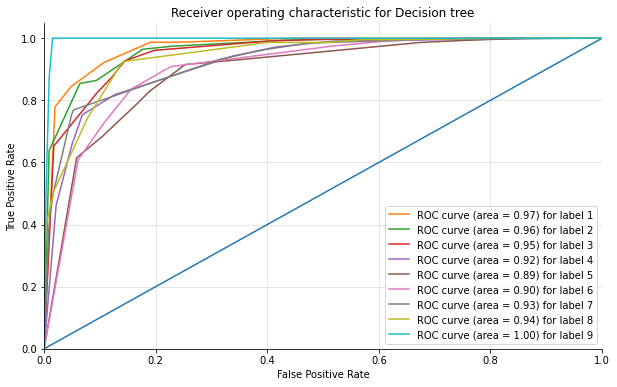

In [ ]:
def plot_multiclass_dtree(dt4, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = dt4.predict_proba(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Decision tree')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_dtree(dt4, X_test_scaled, y_test, n_classes=9, figsize=(10,6))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


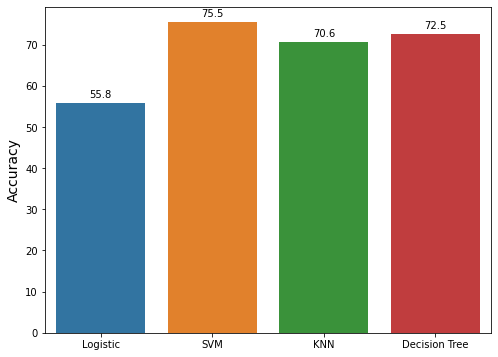

In [ ]:
#visualizing Accuracy results of all the models
x = ['Logistic', 'SVM', 'KNN', 'Decision Tree']
y = [logistic_accuracy, SVM_accuracy, Knn_accuracy, Dtree_accuracy]
plt.figure(figsize=(8, 6))
splot=sns.barplot(x,y)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.ylabel("Accuracy", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")


In [10]:
# testing our model using SVM Classifier 
# We randomly took movie detail (features) of 5th row from our X_test set and passed to SVM classifier to check whether its predict accurately or not

demo=X_test_scaled[5]
y_pred = sv_classifier.predict(demo.reshape(1,-1))
y_pred



array([2])

In [11]:
# Actual observed value of rating for movie at row 5th which is same as predicted value in above cell
y_test.iloc[[5]]

12714    2
Name: avg_vote, dtype: int64